1.import essential libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

2.Read the dataset 

In [2]:
data = pd.read_csv(r"C:\Users\syed9\Downloads\car_age_price (1).csv")

3.basic infromation about the data

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

In [8]:
data.nunique()

Year      8
Price    35
dtype: int64

In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

split the data

In [10]:
x = data.drop('Price',axis=1)
y = data['Price']

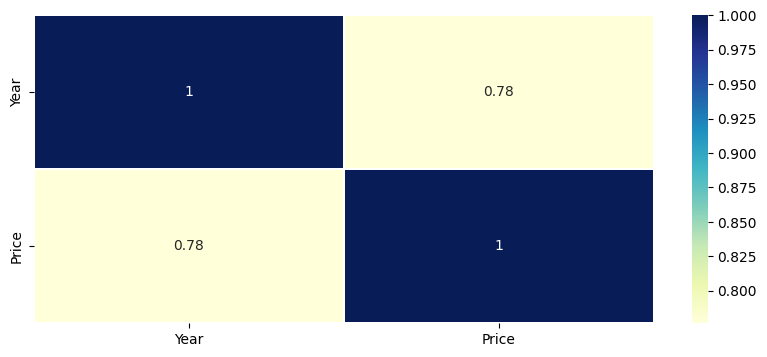

In [11]:
corrmetrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmetrix,linewidths=0.2,annot=True,cmap='YlGnBu')
plt.show()


import functions for testing

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

train the model

In [13]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [27]:
model_linear = lr.fit(x_train,y_train)

In [28]:
print(model_linear)

LinearRegression()


In [29]:
y_pred_linear = model_linear.predict(x_test)

In [30]:
y_pred_linear

array([599223.07304102, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304102, 599223.07304102, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304102,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

find the mean square error

In [31]:
from sklearn.metrics import mean_squared_error

In [34]:
print('MSE IS :\n',mean_squared_error(y_test,y_pred_linear))

MSE IS :
 3878767151.0731072


R2 SQAURE

In [35]:
from sklearn.metrics import r2_score
print('R2 sqaure is :\n',r2_score(y_test,y_pred_linear))

R2 sqaure is :
 0.4347961632108521


lasso

In [36]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=100)
Lasso.fit(x_train,y_train)

Lasso(alpha=100)

In [37]:
y_pred_lasso= Lasso.predict(x_test)

In [38]:
#calculate mean squared error and r2 score
print('MSE IS :\n',mean_squared_error(y_test,y_pred_lasso))

MSE IS :
 3875646466.5369754


In [39]:
print('R2 SCORE IS :\n',r2_score(y_test,y_pred_lasso))

R2 SCORE IS :
 0.4352509012254149


PREDICT THE PRICE OF THE 2022 MODEL

In [40]:
year_2022 = np.array([[2022]]) 

In [44]:


price_linear_2022 = lr.predict(year_2022)


c:\Users\syed9\anaconda3\envs\pro1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
print(f"predicted price (2022_model) - linear regression : {price_linear_2022[0]:.2f} ")

predicted price (2022_model) - linear regression : 740160.12 


In [49]:
price_lasso_2022 = Lasso.predict(year_2022)

c:\Users\syed9\anaconda3\envs\pro1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [52]:
print(f"predicted price (2022_model) - lasso regression :{price_lasso_2022[0]:.2f}")

predicted price (2022_model) - lasso regression :739943.88
